In [39]:
# Data Loading & Exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Load datasets
sales_df = pd.read_csv("sales_data.csv")
churn_df = pd.read_csv("customer_churn.csv")

In [41]:
# Explore structure
print(sales_df.info())
print(churn_df.info())
print(sales_df.head())
print(churn_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 

## Data Cleaning & Preparation


In [42]:
# Convert Date to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [43]:
# Ensure numeric columns
sales_df['Total_Sales'] = pd.to_numeric(sales_df['Total_Sales'], errors='coerce')
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [44]:
# Create calculated columns
sales_df['Revenue'] = sales_df['Quantity'] * sales_df['Price']

## Customer Analysis

In [45]:
def normalize_sales_id(x):
    # Convert CUST001 → C00001
    num = x.replace("CUST", "")
    return "C" + num.zfill(5)

sales_df['Custome_ID_norm'] = sales_df['Customer_ID'].apply(normalize_sales_id)

In [46]:
# Drop the original Customer_ID column
sales_df.drop(columns=['Customer_ID'], inplace=True)

In [47]:
sales_df.head()

,Date,Product,Quantity,Price,Region,Total_Sales,Revenue,Custome_ID_norm
0,2024-01-01,Phone,7,37300,East,261100,261100,C00001
1,2024-01-02,Headphones,4,15406,North,61624,61624,C00002
2,2024-01-03,Phone,2,21746,West,43492,43492,C00003
3,2024-01-04,Headphones,1,30895,East,30895,30895,C00004
4,2024-01-05,Laptop,8,39835,North,318680,318680,C00005


In [48]:
# Merge datasets
merged_df = churn_df.merge(sales_df, left_on="CustomerID", right_on="Custome_ID_norm", how="left")

In [49]:
merged_df.shape

(500, 17)

In [50]:
# Aggregations
customer_revenue = merged_df.groupby("CustomerID")['Revenue'].sum().reset_index()
top_customers = customer_revenue.sort_values(by="Revenue", ascending=False).head(10)

print("Top Customers:\n", top_customers)

Top Customers:
    CustomerID   Revenue
15     C00016  373932.0
6      C00007  363870.0
82     C00083  350888.0
72     C00073  349510.0
19     C00020  333992.0
83     C00084  324144.0
69     C00070  318762.0
4      C00005  318680.0
64     C00065  312564.0
27     C00028  304465.0


## Sales Pattern Analysis

In [51]:
# Monthly sales trend
monthly_sales = merged_df.groupby(sales_df['Date'].dt.month)['Total_Sales'].sum()

In [52]:
# Best-selling products
product_sales = merged_df.groupby("Product")['Total_Sales'].sum().sort_values(ascending=False)

In [53]:
# Regional distribution
region_sales = merged_df.groupby("Region")['Total_Sales'].sum()

## Advanced Analysis

In [54]:
# Pivot table: Revenue by Region vs Product
pivot_region_product = pd.pivot_table(merged_df, values="Total_Sales", index="Region", columns="Product", aggfunc="sum")

In [55]:
# Churn rate
churn_rate = churn_df['Churn'].mean()
print("Churn Rate:", churn_rate)

Churn Rate: 0.106


## Dashboard Creation (Visualizations)

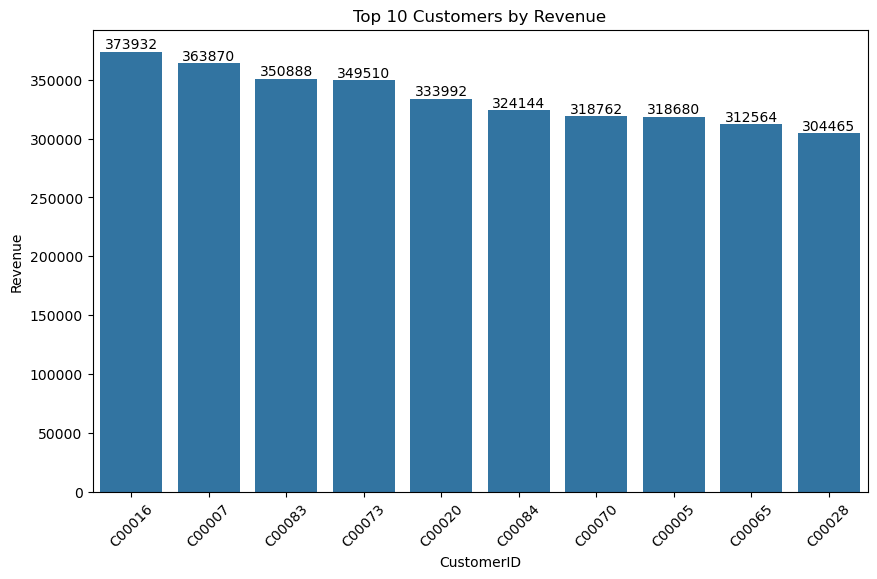

In [56]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="CustomerID", y="Revenue", data=top_customers)
# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')
    
plt.title("Top 10 Customers by Revenue")
plt.xticks(rotation=45)
plt.show()

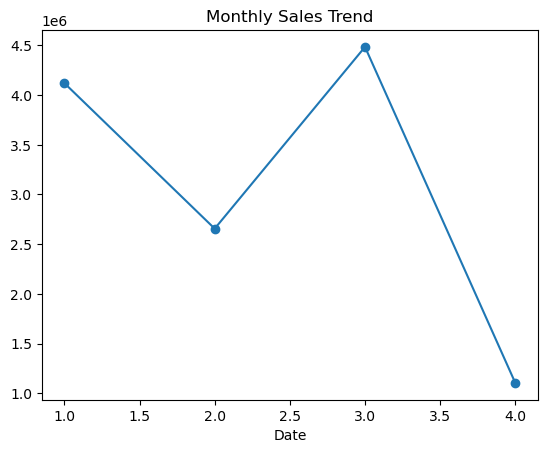

In [57]:
monthly_sales.plot(kind="line", marker="o", title="Monthly Sales Trend")
plt.show()

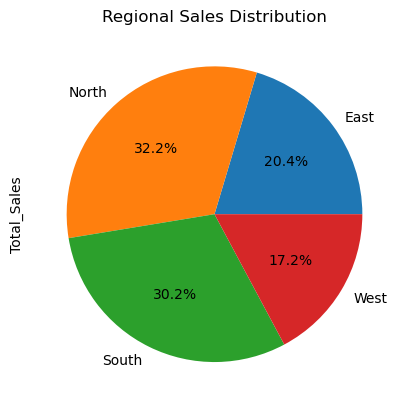

In [58]:
region_sales.plot(kind="pie", autopct='%1.1f%%', title="Regional Sales Distribution")
plt.show()

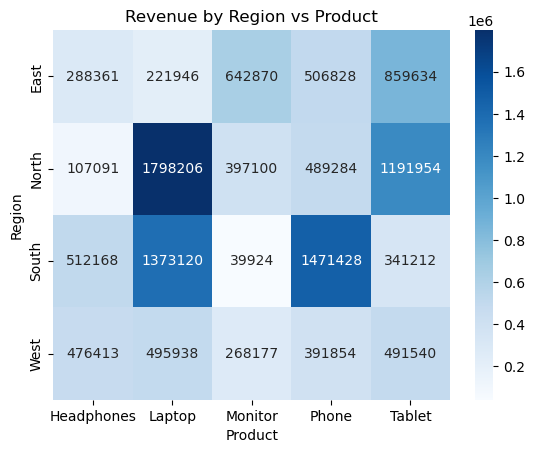

In [59]:
sns.heatmap(pivot_region_product, annot=True, fmt=".0f", cmap="Blues")
plt.title("Revenue by Region vs Product")
plt.show()

## Report & Insights

In [60]:
total_revenue = merged_df['Total_Sales'].sum()
total_customers = merged_df['CustomerID'].nunique()
average_order_value = merged_df['Total_Sales'].mean()

In [61]:
merged_df.head()

,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn,Date,Product,Quantity,Price,Region,Total_Sales,Revenue,Custome_ID_norm
0,C00001,6,64,1540,One year,Credit Card,No,1,0,2024-01-01,Phone,7.0,37300.0,East,261100.0,261100.0,C00001
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0,2024-01-02,Headphones,4.0,15406.0,North,61624.0,61624.0,C00002
2,C00003,27,31,1455,Two year,Credit Card,No,1,0,2024-01-03,Phone,2.0,21746.0,West,43492.0,43492.0,C00003
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0,2024-01-04,Headphones,1.0,30895.0,East,30895.0,30895.0,C00004
4,C00005,16,185,1023,One year,Electronic Check,No,1,0,2024-01-05,Laptop,8.0,39835.0,North,318680.0,318680.0,C00005


In [62]:
# Identify top customer
customer_revenue = merged_df.groupby("CustomerID")['Total_Sales'].sum().reset_index()
top_customer_row = customer_revenue.loc[customer_revenue['Total_Sales'].idxmax()]
top_customer = top_customer_row['CustomerID']
top_customer_value = top_customer_row['Total_Sales']

print("CUSTOMER SALES ANALYSIS REPORT")
print(f"Total Revenue: ${total_revenue:,.0f}")
print(f"Total Customers: {total_customers:,}")
print(f"Average Order Value: ${average_order_value:,.0f}")
print(f"Top Customer: {top_customer} - ${top_customer_value:,.0f}")

CUSTOMER SALES ANALYSIS REPORT
Total Revenue: $12,365,048
Total Customers: 500
Average Order Value: $123,650
Top Customer: C00016 - $373,932
